In [1]:
import pandas as pd
import sqlite3
import numpy as np

In [2]:
conn = sqlite3.connect('data/im.db')
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')

In [6]:
# Removing rows with missing values in the 'runtime_minutes' column of movie_basics DataFrame
movie_basics_cleaned = movie_basics.dropna(subset=['runtime_minutes'])

In [7]:
movie_basics_cleaned.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


0

In [8]:
# Removing rows with missing values in the 'foreign_gross' column of bom_movie_gross DataFrame
bom_movie_gross_cleaned = bom_movie_gross.dropna(subset=['foreign_gross'])

In [10]:
bom_movie_gross_cleaned.tail()

,title,studio,domestic_gross,foreign_gross,year
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018
3353,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000,2018


In [44]:
# Removing rows with missing values in the 'runtime_minutes' column of movie_basics DataFrame
movie_basics_cleaned = movie_basics.dropna(subset=['runtime_minutes'])

In [45]:
# Merge movie_basics_cleaned and movie_ratings on 'movie_id'
merged_imdb_data = pd.merge(movie_basics_cleaned, movie_ratings, on='movie_id')

# Display the first few rows of the merged DataFrame
merged_imdb_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [32]:
merged_imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66236 entries, 0 to 66235
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   primary_title    66236 non-null  object 
 2   original_title   66236 non-null  object 
 3   start_year       66236 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    66236 non-null  float64
 7   numvotes         66236 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


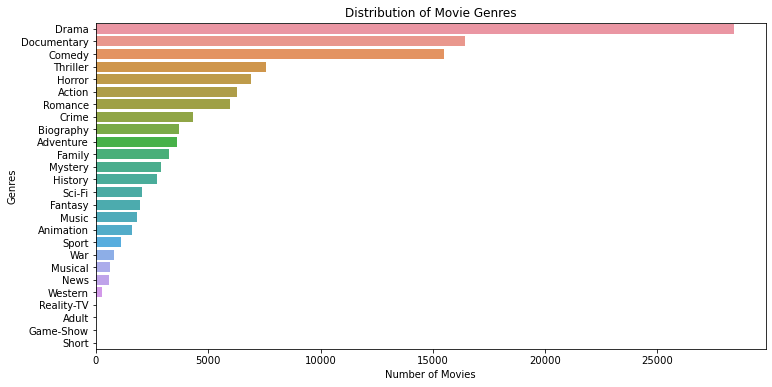

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split the genres by ',' and explode the DataFrame
genres_exploded = merged_imdb_data.assign(genres=merged_imdb_data['genres'].str.split(',')).explode('genres')

# Plot the genre distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=genres_exploded['genres'], order=genres_exploded['genres'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

# Runtime Analysis

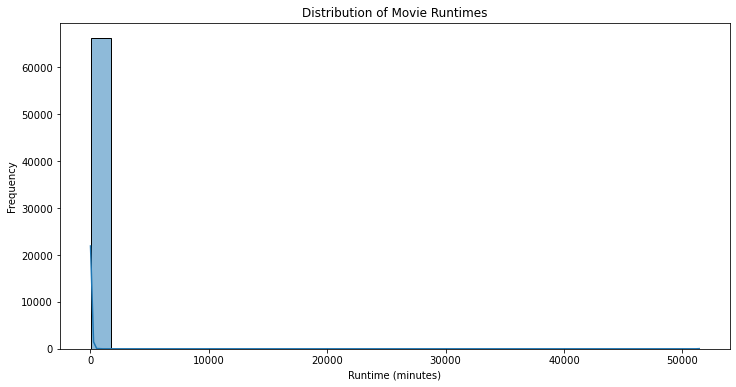

In [50]:
# Plot the distribution of movie runtimes
plt.figure(figsize=(12, 6))
sns.histplot(merged_imdb_data['runtime_minutes'].dropna(), kde=True, bins=30)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

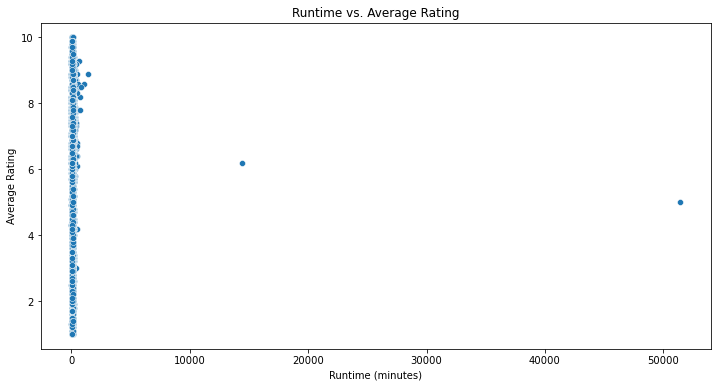

In [51]:
# Plot runtime vs. average rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime_minutes', y='averagerating', data=merged_imdb_data)
plt.title('Runtime vs. Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()

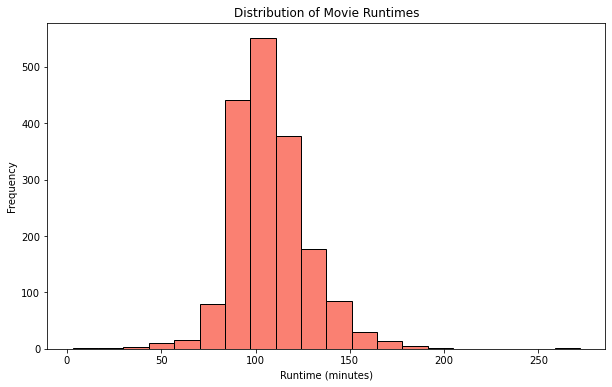

In [20]:
# Runtime Analysis
plt.figure(figsize=(10, 6))
plt.hist(movies['runtime_minutes'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

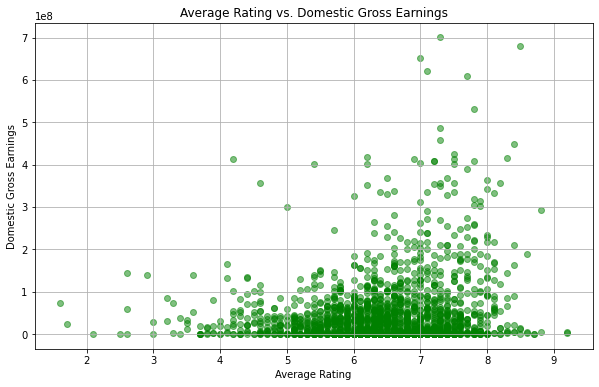

In [21]:
# Rating and Revenue Analysis
plt.figure(figsize=(10, 6))
plt.scatter(movies['averagerating'], movies['domestic_gross'], alpha=0.5, color='green')
plt.title('Average Rating vs. Domestic Gross Earnings')
plt.xlabel('Average Rating')
plt.ylabel('Domestic Gross Earnings')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

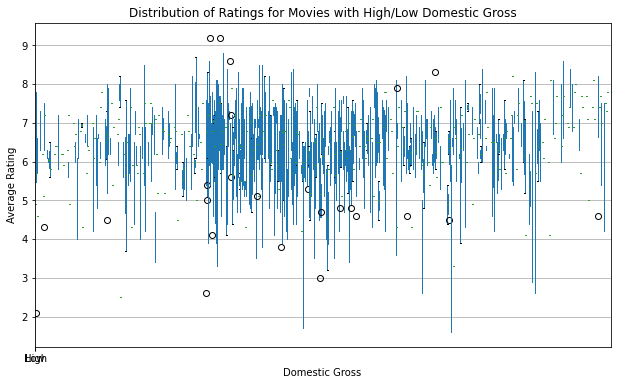

In [22]:
plt.figure(figsize=(10, 6))
movies.boxplot(column='averagerating', by='domestic_gross', figsize=(10, 6))
plt.title('Distribution of Ratings for Movies with High/Low Domestic Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Average Rating')
plt.xticks([1, 2], ['Low', 'High'])
plt.suptitle('')
plt.show()

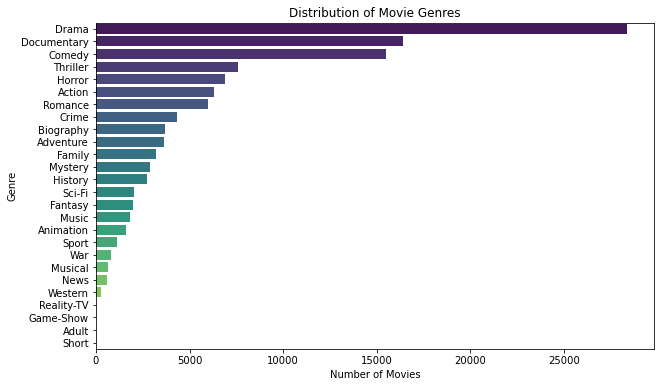

In [52]:
# Split genres and count occurrences
genre_counts = merged_imdb_data['genres'].str.get_dummies(sep=',').sum().sort_values(ascending=False)

# Plot the genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

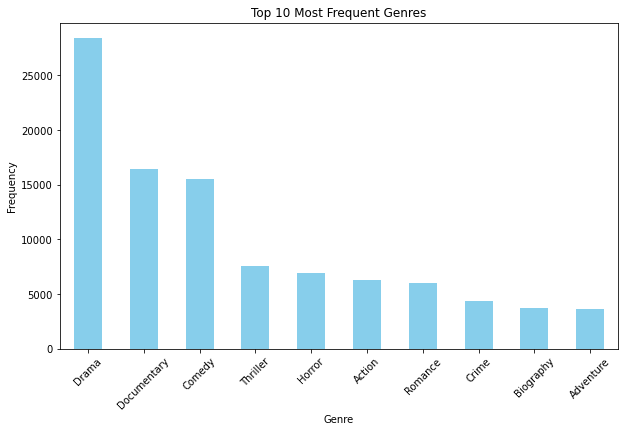

In [56]:
# Genre Analysis
# Count the frequency of each genre
genre_counts = merged_imdb_data['genres'].str.split(',', expand=True).stack().value_counts()

# Plot the top 10 most frequent genres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

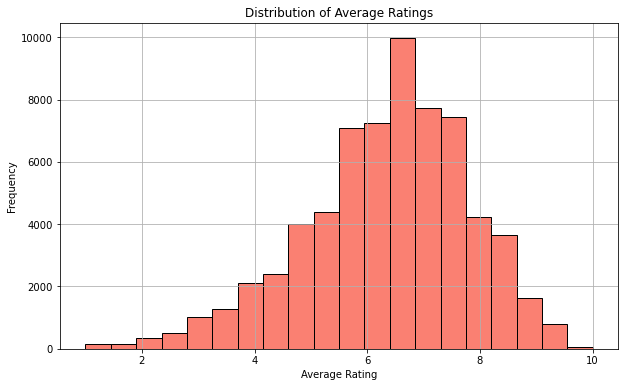

In [60]:
# Plot a histogram of average ratings
plt.figure(figsize=(10, 6))
plt.hist(merged_imdb_data['averagerating'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

ValueError: x and y must be the same size

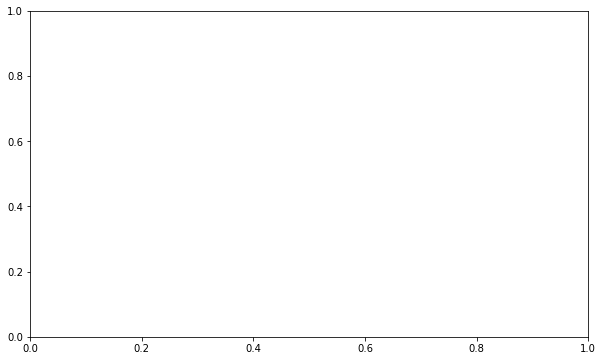

In [63]:
# Relationship between ratings and earnings
plt.figure(figsize=(10, 6))
plt.scatter(merged_imdb_data['averagerating'], bom_movie_gross['domestic_gross'], color='salmon')
plt.title('Relationship between Movie Ratings and Domestic Gross Earnings')
plt.xlabel('Average Rating')
plt.ylabel('Domestic Gross Earnings')
plt.show()

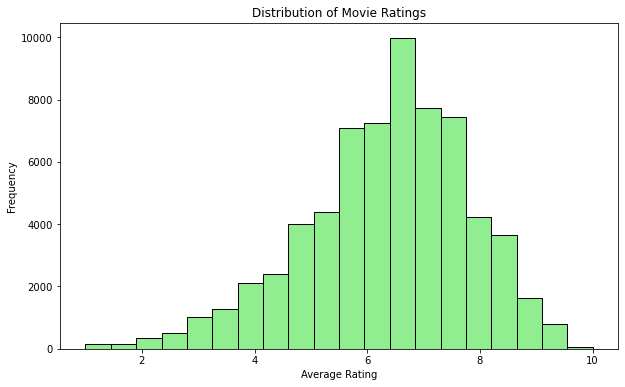

In [64]:
# Distribution of movie ratings
plt.figure(figsize=(10, 6))
plt.hist(merged_imdb_data['averagerating'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# NEW

In [76]:
# Merge merged_imdb_data and bom_movie_gross on movie title
combined_data = pd.merge(merged_imdb_data, bom_movie_gross, left_on='primary_title', right_on='title', how='inner')

# Display the first few rows of the merged DataFrame
combined_data.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
2975,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,The Chambermaid,FM,300.0,NaN,2015
2976,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,How Long Will I Love U,WGUSA,747000.0,82100000,2018
2977,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,NaN,2018
2978,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,Last Letter,CL,181000.0,NaN,2018
2979,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018


In [72]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 0 to 2979
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2980 non-null   object 
 1   primary_title    2980 non-null   object 
 2   original_title   2980 non-null   object 
 3   start_year       2980 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           2975 non-null   object 
 6   averagerating    2980 non-null   float64
 7   numvotes         2980 non-null   int64  
 8   title            2980 non-null   object 
 9   studio           2977 non-null   object 
 10  domestic_gross   2958 non-null   float64
 11  foreign_gross    1794 non-null   object 
 12  year             2980 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 325.9+ KB


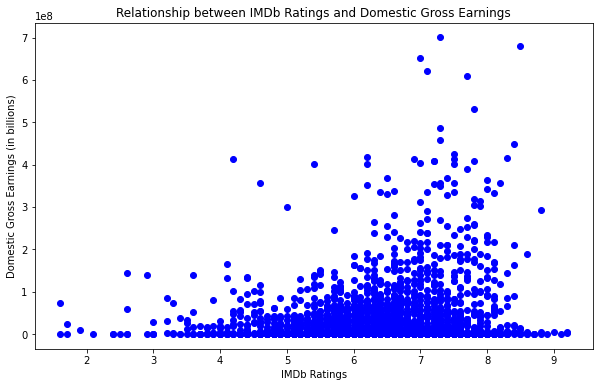

In [73]:
# Scatter plot of domestic gross earnings vs IMDb ratings
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['averagerating'], combined_data['domestic_gross'], color='blue')
plt.title('Relationship between IMDb Ratings and Domestic Gross Earnings')
plt.xlabel('IMDb Ratings')
plt.ylabel('Domestic Gross Earnings (in billions)')
plt.show()

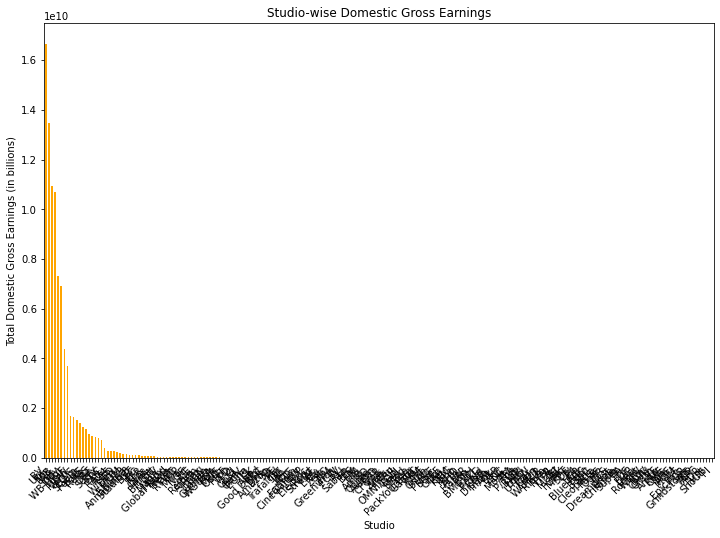

In [74]:
# Bar chart of studio-wise domestic gross earnings
plt.figure(figsize=(12, 8))
studio_gross = combined_data.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
studio_gross.plot(kind='bar', color='orange')
plt.title('Studio-wise Domestic Gross Earnings')
plt.xlabel('Studio')
plt.ylabel('Total Domestic Gross Earnings (in billions)')
plt.xticks(rotation=45, ha='right')
plt.show()

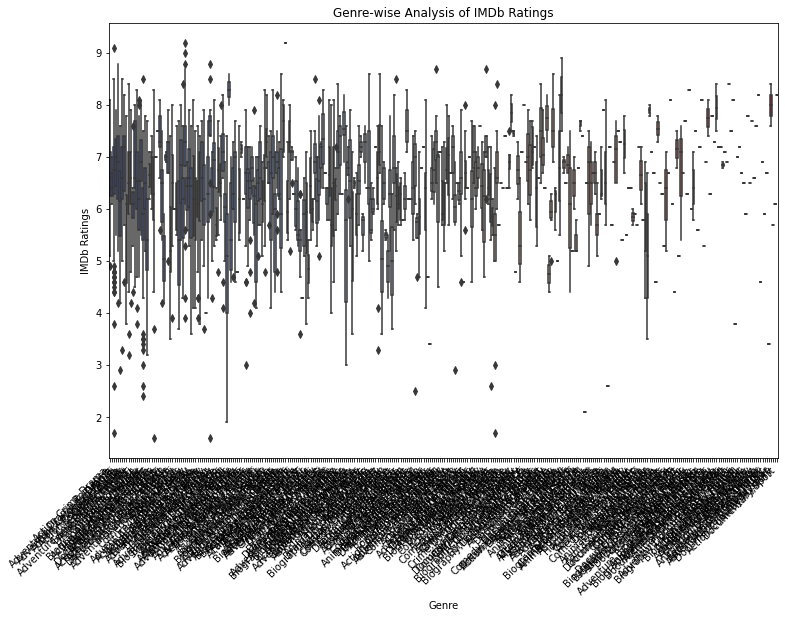

In [75]:
# Box plot of IMDb ratings across different genres
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='averagerating', data=combined_data, palette='coolwarm')
plt.title('Genre-wise Analysis of IMDb Ratings')
plt.xlabel('Genre')
plt.ylabel('IMDb Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

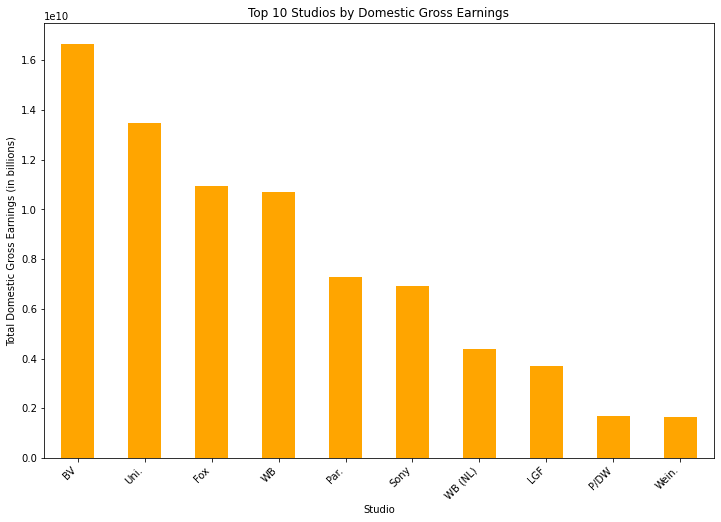

In [77]:
# Selecting the top 10 studios based on domestic gross earnings
top_10_studios = studio_gross.head(10)

# Bar chart of studio-wise domestic gross earnings for the top 10 studios
plt.figure(figsize=(12, 8))
top_10_studios.plot(kind='bar', color='orange')
plt.title('Top 10 Studios by Domestic Gross Earnings')
plt.xlabel('Studio')
plt.ylabel('Total Domestic Gross Earnings (in billions)')
plt.xticks(rotation=45, ha='right')
plt.show()

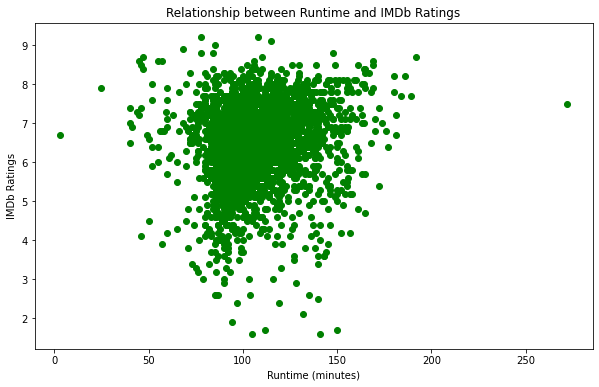

In [79]:
# Scatter plot of runtime vs IMDb ratings
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['runtime_minutes'], combined_data['averagerating'], color='green')
plt.title('Relationship between Runtime and IMDb Ratings')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Ratings')
plt.show()


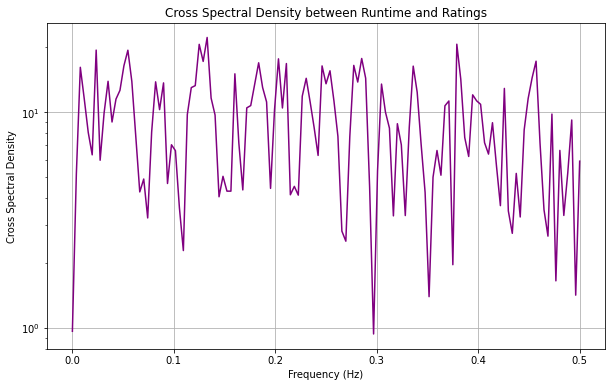

In [82]:
import numpy as np
from scipy import signal

# Filter out rows with missing values in runtime_minutes and averagerating columns
filtered_data = combined_data.dropna(subset=['runtime_minutes', 'averagerating'])

# Define runtime and rating variables
runtime = filtered_data['runtime_minutes']
ratings = filtered_data['averagerating']

# Compute Cross Spectral Density
frequencies, cross_density = signal.csd(runtime, ratings, fs=1.0)

# Plot Cross Spectral Density
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, np.abs(cross_density), color='purple')
plt.title('Cross Spectral Density between Runtime and Ratings')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Cross Spectral Density')
plt.grid()
plt.show()


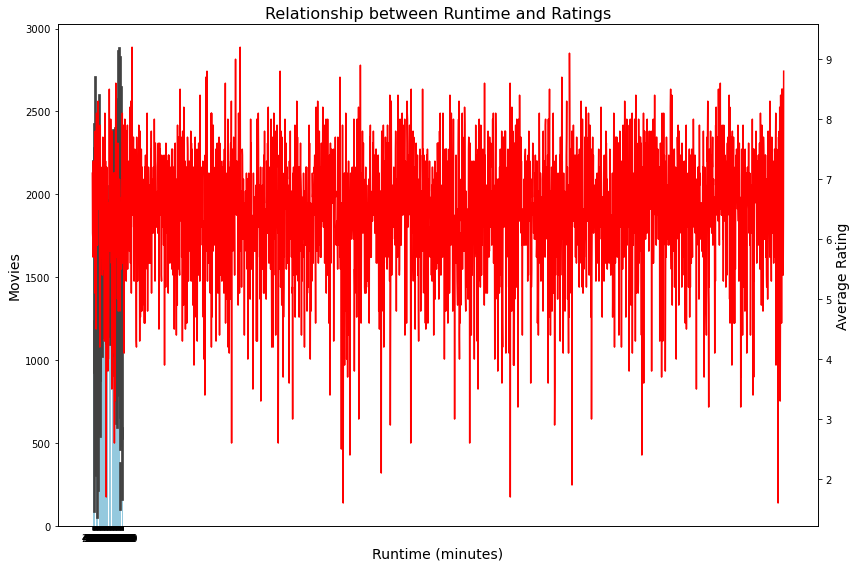

In [83]:
import seaborn as sns

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting bar graph for runtime
sns.barplot(x='runtime_minutes', y=combined_data.index, data=combined_data, ax=ax1, color='skyblue')
ax1.set_xlabel('Runtime (minutes)', fontsize=14)
ax1.set_ylabel('Movies', fontsize=14)
ax1.set_title('Relationship between Runtime and Ratings', fontsize=16)

# Create a second y-axis for ratings
ax2 = ax1.twinx()
sns.lineplot(x=combined_data.index, y='averagerating', data=combined_data, ax=ax2, color='red')
ax2.set_ylabel('Average Rating', fontsize=14)

plt.tight_layout()
plt.show()


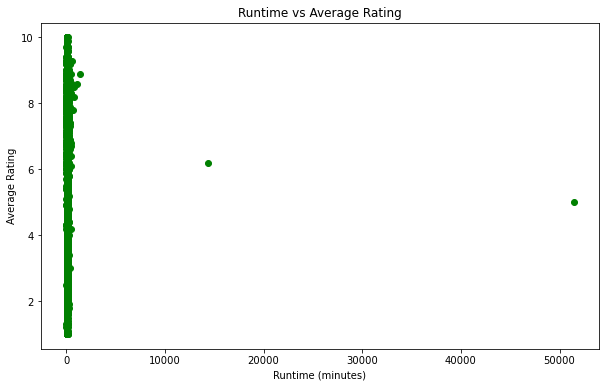

In [84]:
# Scatter plot of runtime_minutes vs averagerating
plt.figure(figsize=(10, 6))
plt.scatter(merged_imdb_data['runtime_minutes'], merged_imdb_data['averagerating'], color='green')
plt.title('Runtime vs Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()

In [86]:
# Compute descriptive statistics for runtime_minutes and averagerating
runtime_stats = merged_imdb_data['runtime_minutes'].describe()
rating_stats = merged_imdb_data['averagerating'].describe()

print("Descriptive Statistics for Runtime (in minutes):\n", runtime_stats)
print("\nDescriptive Statistics for Average Rating:\n", rating_stats)


Descriptive Statistics for Runtime (in minutes):
 count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

Descriptive Statistics for Average Rating:
 count    66236.000000
mean         6.321925
std          1.458443
min          1.000000
25%          5.500000
50%          6.500000
75%          7.300000
max         10.000000
Name: averagerating, dtype: float64


In [87]:
# Compute correlation coefficient between runtime_minutes and averagerating
correlation = merged_imdb_data['runtime_minutes'].corr(merged_imdb_data['averagerating'])
print("\nCorrelation between Runtime and Average Rating:", correlation)


Correlation between Runtime and Average Rating: -0.006963469265963988


In [91]:
# Count the frequency of each genre
genre_counts = merged_imdb_data['genres'].str.split(',', expand=True).stack().value_counts()

# Get the top 10 most frequent genres
top_10_genres = genre_counts.head(10).index.tolist()

# Filter the dataset to include only the top 10 genres
def filter_top_genres(row):
    genres = row.split(',')
    return [genre for genre in genres if genre in top_10_genres]

# Apply the filter function and explode the genres column
filtered_data = merged_imdb_data.copy()
filtered_data['genres'] = filtered_data['genres'].apply(filter_top_genres)
filtered_data = filtered_data.explode('genres')

# Only keep rows with top 10 genres
filtered_data = filtered_data[filtered_data['genres'].isin(top_10_genres)]

# Plot the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='averagerating', data=filtered_data, palette='coolwarm')
plt.title('Genre-wise Analysis of IMDb Ratings (Top 10 Genres)')
plt.xlabel('Genre')
plt.ylabel('IMDb Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'